# Modeling 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from modeling import baseline_modeling
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

## Setting dataframes
- df_baseline is just numerical data
- just metadata dataframe (in the works)
- df_text is with vectorized description
    - this was already split into train and test sets to preprocess
    - going to be joined to df after splitting into train/test

In [2]:
# load in dataframe
df = pd.read_csv('csv_files/9_1_all_books_df.csv')

# this just includes pages and ratings along with the target of best seller or not
df_baseline = df[['rating', 'pages', 'best_seller']]

# this data is already split into the training set with a reset index
# so it will be concated with the df after spliting into train and test sets
df_text_X = pd.read_csv('csv_files/X_train_nlp.csv')
df_text_y= pd.read_csv('csv_files/y_train_nlp.csv', header=None)
df_text_X_test = pd.read_csv('csv_files/X_test_nlp.csv')
df_text_y_test = pd.read_csv('csv_files/y_test_nlp.csv', header=None)

# target names is in modeling.py
# split the dataset into training and validation datasets for just numerical data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(df_baseline[['rating', 'pages']], 
                                                                    df_baseline['best_seller'], 
                                                                    test_size = .2,
                                                                   random_state=42)

df_text = df_text_X 
df_text['_target'] = df_text_y[0]
# deep vs shallow copies
df_text_X = df_text_X.loc[:, df_text_X.columns != '_target']

# Tree based Modeling

## Numerical Random Forest

In [3]:
rf = RandomForestClassifier(random_state=42)

In [4]:
baseline_modeling(rf, X_train_rating, y_train_rating)

{"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features='auto',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=42, verbose=0,\n                       warm_start=False) score": 0.982695810564663,
 'clf confusion': array([[868,   3],
        [ 16, 211]])}

{"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features='auto',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=42, verbose=0,\n                       warm_start=False) score": 0.982695810564663,
 'clf confusion': array([[868,   3],
        [ 16, 211]])}

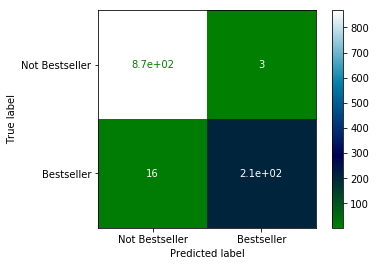

In [5]:
baseline_modeling(rf, X_train_rating, y_train_rating)

In [6]:
# random_forest.decision_path(X_train_rating)

In [7]:
# random_forest.decision_path(X_test_rating)

In [8]:
# random_forest.feature_importances_

## Text Modeling Random Forest

In [9]:
rf_text = RandomForestClassifier(random_state=42)

{"RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features='auto',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=42, verbose=0,\n                       warm_start=False) score": 0.98816029143898,
 'clf confusion': array([[869,   2],
        [ 11, 216]])}

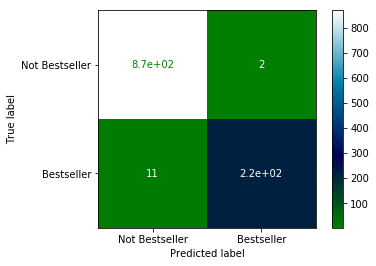

In [10]:
baseline_modeling(rf_text, df_text_X, df_text_y[0])


In [11]:
rf_text.score(df_text_X, df_text_y[0])

0.98816029143898

# Logistic Regression

## Numerical Logistic

In [12]:
log  = LogisticRegression(random_state=42)

{"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False) score": 0.807832422586521,
 'clf confusion': array([[862,   9],
        [202,  25]])}

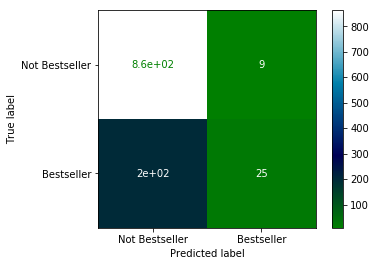

In [13]:
baseline_modeling(log, X_train_rating, y_train_rating)

In [14]:
log_cv = LogisticRegressionCV(cv = 5, random_state=42)

{"LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,\n                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,\n                     max_iter=100, multi_class='auto', n_jobs=None,\n                     penalty='l2', random_state=42, refit=True, scoring=None,\n                     solver='lbfgs', tol=0.0001, verbose=0) score": 0.8060109289617486,
 'clf confusion': array([[860,  11],
        [202,  25]])}

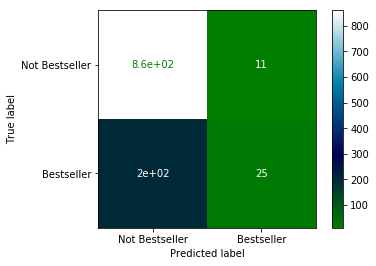

In [15]:
baseline_modeling(log_cv, X_train_rating, y_train_rating)

## Text Modeling Logistic 

In [16]:
log_text = LogisticRegression(random_state=42)

{"LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False) score": 0.9653916211293261,
 'clf confusion': array([[871,   0],
        [ 38, 189]])}

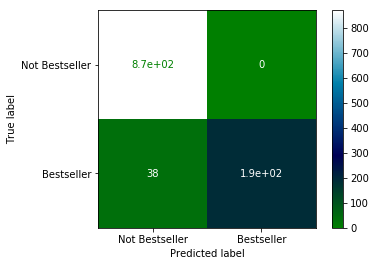

In [17]:
baseline_modeling(log_text, df_text_X, df_text_y[0] )

In [18]:
# max iterations needed to be 100 -> 400 for text modeling
log_text_cv = LogisticRegressionCV(cv = 5, max_iter=400, random_state=42)

{"LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,\n                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,\n                     max_iter=400, multi_class='auto', n_jobs=None,\n                     penalty='l2', random_state=42, refit=True, scoring=None,\n                     solver='lbfgs', tol=0.0001, verbose=0) score": 0.9389799635701275,
 'clf confusion': array([[871,   0],
        [ 67, 160]])}

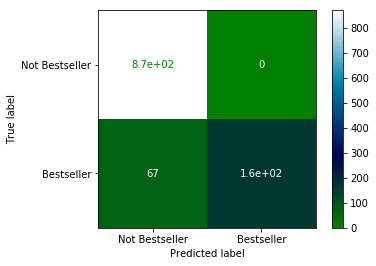

In [19]:
baseline_modeling(log_text_cv, df_text_X, df_text_y[0] )

the cross validated logistic fit the training data slightly less.

# optimization

## Logistic Regression

In [20]:
# only use penalty_e with 'saga'
penalty_e = 'elasticnet'
solver_e = 'saga'

#  'newton-cg', 'lbfgs', ‘sag’ and ‘saga’ handle L2 or no penalty
# ‘liblinear’ solver supports both L1 and L2 regularization
#  ‘elasticnet’ penalty is only supported by the ‘saga’ solver.
penalty_l1_l2 = ['l1', 'l2']
solvers_l1_l2 = ['saga', 'linlinear']

# 'newton-cg' , 'lbfgs' , 'sag' , also not using 'saga'
# using penalty_l2, these solvers can't use 'l1'
penalty_l2 = ['l2', 'none']
solvers_l2 = ['newton-cg', 'lbfgs', 'sag' ]

# range of values for C
C = np.logspace(-4, 4, 50)
# {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [21]:
# hyperparameter space to iterate over
distributions_l1_l2 = dict(C = np.logspace(-4, 4, 50),
                    penalty = penalty_l1_l2,
                    solver = solvers_l1_l2)

distributions_l2 = dict(C = np.logspace(-4, 4, 50),
                    penalty = penalty_l2,
                    solver = solvers_l2)

In [22]:
log_opt = LogisticRegression(random_state=42)


In [23]:
log_ran = RandomizedSearchCV(log_opt, distributions_l1_l2, random_state=42)


In [24]:
search = log_ran.fit(X_train_rating, y_train_rating)

In [25]:
search.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.0013894954943731374}

In [26]:
search.score(X_train_rating, y_train_rating)

0.7932604735883424

In [27]:
log_opt_l2 = LogisticRegression(random_state=42)

In [28]:
log_ran_l2 = RandomizedSearchCV(log_opt_l2, distributions_l2, random_state=42)

In [29]:
search_l2 = log_ran_l2.fit(X_train_rating, y_train_rating)

In [30]:
search_l2.best_params_

{'solver': 'newton-cg', 'penalty': 'none', 'C': 0.00014563484775012445}

In [31]:
search_l2.score(X_train_rating, y_train_rating)

0.8060109289617486

In [32]:
log_cv

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=42, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [33]:
log_cv.score(X_train_rating, y_train_rating)

0.8060109289617486

# testing data

# TODO
- check randomized search
- testing data